# Bioinformatics Project - Computational Drug Discovery - Influenza virus A matrix protein M2  
Michael Bahchevanov  
***

## Modelling & Regression Comparison 🧪  
After we have generated the **molecular fingerprint** and normalized our values, in this notebook we will be comparing several ML algorithms and building regression models of the *Influenza virus A matrix protein M2* inhibitors/activators. We will be using the *lazypredict* library which is a convenient way of testing the most known, best performing algorithms with their default parameters. Afterwards, we will be checking the metrics by the means of **time**, **RMSE (Root Mean Squared Error)**, and **R-Squared (R$^2$)**.

### 1. Installing Libraries and Tooling 🔧  
We will be installing the *lazypredict* library for ML regression comparison, we will also be using *sklearn* for their general ML utilities, *seaborn* for visualization of the results, *numpy* for computation, and *pandas* for data wrangling and loading.

In [1]:
!pip install lazypredict

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

sns.set_theme(style='whitegrid')

np.random.seed(42)

/home/mykull/miniconda3/envs/bioinformatics/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


### 2. Loading in the data 📂  
Now we will be loading in our fingerprinted data.

In [3]:
df = pd.read_csv('./data/influenza_virus_A_matrix_M2_protein_08_morgan_matrix_fingerprint.csv')
df.head()

0    1    2    3    4    5    6    7    8    9   10   11   12   13   14  \
0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00   
1 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00   
2 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00   
3 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00   
4 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00   

    15   16   17   18   19   20   21   22   23   24   25   26   27   28   29  \
0 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
2 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
3 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
4 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   

    30   31   32   33   34   35   36   37   38   39   40   41   42   43   44  \
0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
2 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
3 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
4 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   

    45   46   47   48   49   50   51   52   53   54   55   56   57   58   59  \
0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
2 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
3 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
4 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   

    60   61   62   63   64   65   66   67   68   69   70   71   72   73   74  \
0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
2 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
3 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
4 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   

    75   76   77   78   79   80   81   82   83   84   85   86   87   88   89  \
0 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00   
1 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00   
2 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00   
3 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00   
4 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00   

    90   91   92   93   94   95   96   97   98   99  100  101  102  103  104  \
0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
2 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
3 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
4 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   

   105  106  107  108  109  110  111  112  113  114  115  116  117  118  119  \
0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
2 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
3 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   
4 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   

   120  121  122  123  124  125  126  127  128  129  130  131  132  133  134  \
0 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 

Now, we will be separating the ***X*** and ***Y*** variables for modelling.

In [4]:
X = df.drop('pEC50', axis=1)
y = df['pEC50']

### 3. Data Pre-processing 🔨  
We will be removing the low variance features. For this selection, we will be using *sklearn's* `VarianceThreshold` transformer.

In [5]:
from sklearn.feature_selection import VarianceThreshold

In [6]:
X.shape

(47, 2048)

In [7]:
selection = VarianceThreshold(threshold=(.8 * (1 -.8)))
X = selection.fit_transform(X)
X.shape

(47, 44)

We can see that from the *Morgan bit vector's* 2048 features we are left with 44.  
Now we will be splitting the data into training and testing via *sklearn's* `train_test_split` in a 80/20 fashion.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, train_size=.8)

In [9]:
print(f'Dimensions of the training and testing sets:\nTraining: {X_train.shape},\nValidation: {X_test.shape}, \nTarget Testing:{y_train.shape}, \nTarget Validation:{y_test.shape}')

Dimensions of the training and testing sets:
Training: (37, 44),
Validation: (10, 44), 
Target Testing:(37,), 
Target Validation:(10,)


Before modelling, this is the overview of our data and how it is used:  
* **X_train** - contains the molecular fingerprints of the Morgan bit vector after dropping the low variance features - this is the training set for the features  
* **X_test** - contains the molecular fingerprints of the Morgan bit vector after dropping the low variance features - this is the testing set for the features  
* **y_train** - contains the pEC50 measurement of concentration for the independent (target) variable - this is the training set for the independent variable
* **y_test** - contains the pEC50 measurement of concentration for the independent (target) variable - this is the testing set for the independent variable  

### 4. Machine Learning Algorithms Comparison 📏

In [10]:
clf_test = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
train, test = clf_test.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:01<00:00, 22.01it/s]


Performance table of the training set (80% subset):

In [11]:
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
KernelRidge,31.76,-118.63,5.72,0.02
GaussianProcessRegressor,25.78,-95.38,5.13,0.02
MLPRegressor,4.45,-12.43,1.92,0.11
Lars,3.82,-9.97,1.73,0.02
HuberRegressor,2.19,-3.63,1.12,0.03
TransformedTargetRegressor,2.04,-3.06,1.05,0.03
LinearRegression,2.04,-3.06,1.05,0.01
LinearSVR,1.89,-2.47,0.97,0.01
PassiveAggressiveRegressor,1.74,-1.87,0.89,0.01


Performance table of the test set (20% subset)

In [12]:
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
KernelRidge,31.76,-118.63,5.72,0.02
GaussianProcessRegressor,25.78,-95.38,5.13,0.02
MLPRegressor,4.45,-12.43,1.92,0.11
Lars,3.82,-9.97,1.73,0.02
HuberRegressor,2.19,-3.63,1.12,0.03
TransformedTargetRegressor,2.04,-3.06,1.05,0.03
LinearRegression,2.04,-3.06,1.05,0.01
LinearSVR,1.89,-2.47,0.97,0.01
PassiveAggressiveRegressor,1.74,-1.87,0.89,0.01


Overall, from all the 41 regressors compared, the **Random Forest Regressor (RFR)** yields the best results with the lowest **RMSE** score and a **R$^{2}$** score of ≈ 0.7

### 5. Visualization of Model Performance

#### 5.1 Bar plot of **R$^{2}$** values:

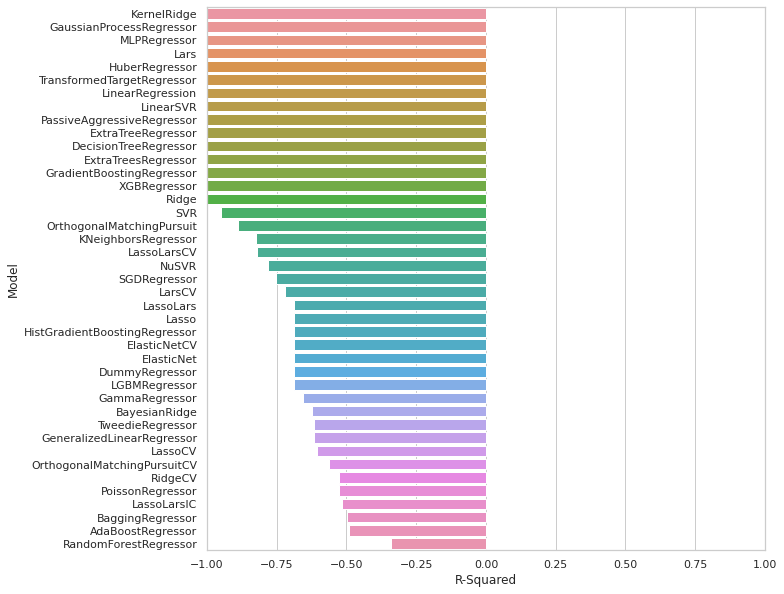

In [13]:
plt.figure(figsize=(10,10))
ax = sns.barplot(y=train.index, x='R-Squared', data=train)
ax.set(xlim=(-1, 1))
plt.show()

#### 5.2 Bar plot of **RMSE** values:

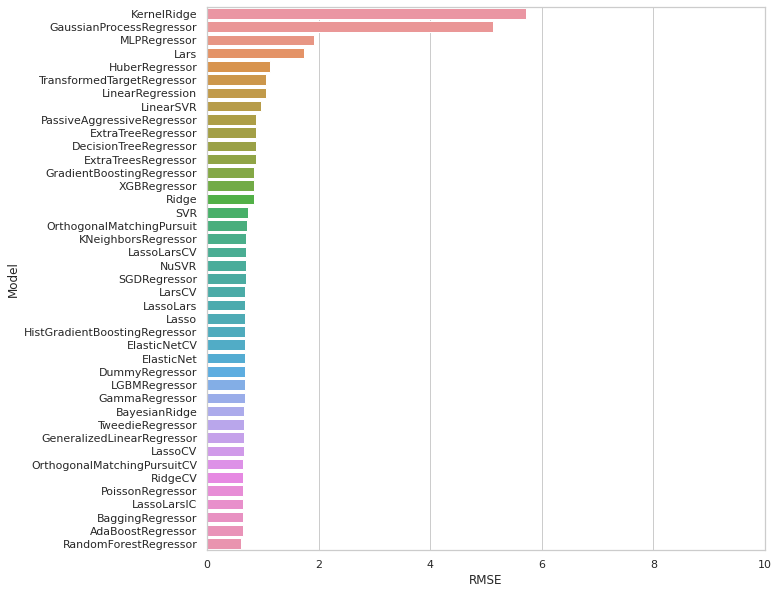

In [14]:
plt.figure(figsize=(10,10))
ax = sns.barplot(y=train.index, x='RMSE', data=train)
ax.set(xlim=(0, 10))
plt.show()

#### 5.3 Bar plot of **Calculation Time**:

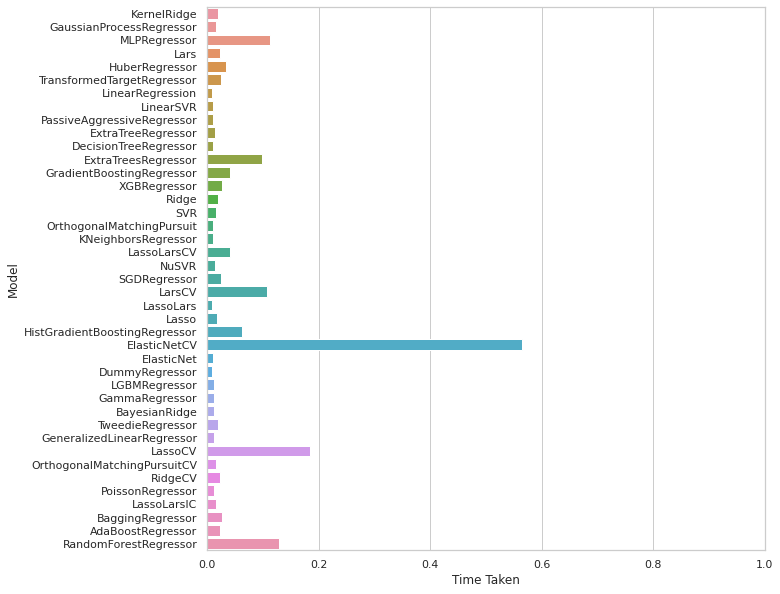

In [15]:
plt.figure(figsize=(10,10))
ax = sns.barplot(y=train.index, x='Time Taken', data=train)
ax.set(xlim=(0, 1))
plt.show()

#### 5.4 Interpretation of Visualizations  
Overall, we can see that from the models we have compared we can conclude that the worst performing model would be **Kernel Ridge** with a big error measurement and a low R$^{2}$ value. The best performing model would be the **Random Forest Regressor (RFR)**, with the best time performance. Another point to mention is that, unfortunately, there are not many bioactive compounds that interact with the *M2 protein in Influenza virus A* which makes it difficult to train a model to recognize patterns, chemical space, and/or interactions. Due to that, we can see a very poor performance of the models in general, as it can be seen by the **RMSE** and the **R$^{2}$**. A way of working around that and finding a suitable inhibitor would be to look into the whole organism, namely the *Influenza virus A* and not a specific protein inside the virus' structure.

*** 
### Overview
In this notebook we compared and visualized the results of the most commonly used regressors and landed on 1 regressor that yields the best results - **Random Forest Regressor (RFR)**. Our next steps would be to look into optimizing and attempting for final results with the regressor. We will also be looking into **RMT (Random Matrix Theory)** with the **decoy** set we have created. Another point to mention is the low performance of the model, due to the lack of recorded data. In order to provide a general well-performing model, we may want to look into the *Influenza virus A* as a whole since there would be a higher amount of recorded data available.